# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# Import datetime mod from datetime library (chat GPT)
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city name (chat gpt asistance)
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
   

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["weather"][0]["description"]
        city_clouds_numberical = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        
        # Convert the date from epoch to datetime (suggested by chat GPT)
        city_date = datetime.fromtimestamp(city_weather_json["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Cloudiness Numberical": city_clouds_numberical,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | emerald
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | faya-largeau
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | amahai
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | whitehorse
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                     574
Lat                      574
Lng                      574
Max Temp                 574
Humidity                 574
Cloudiness               574
Cloudiness Numberical    574
Wind Speed               574
Country                  574
Date                     574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Cloudiness Numberical,Wind Speed,Country,Date
0,emerald,-23.5333,148.1667,74.98,42,broken clouds,84,12.24,AU,2025-03-06 15:14:32
1,papatowai,-46.5619,169.4708,51.19,88,overcast clouds,100,6.76,NZ,2025-03-06 15:14:34
2,puerto natales,-51.7236,-72.4875,46.04,86,light rain,100,5.14,CL,2025-03-06 15:14:35
3,faya-largeau,17.9257,19.1043,75.85,18,overcast clouds,98,17.52,TD,2025-03-06 15:14:36
4,klyuchi,52.2667,79.1667,33.44,79,overcast clouds,95,20.09,RU,2025-03-06 15:14:37


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Cloudiness Numberical,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,emerald,-23.5333,148.1667,74.98,42,broken clouds,84,12.24,AU,2025-03-06 15:14:32
1,papatowai,-46.5619,169.4708,51.19,88,overcast clouds,100,6.76,NZ,2025-03-06 15:14:34
2,puerto natales,-51.7236,-72.4875,46.04,86,light rain,100,5.14,CL,2025-03-06 15:14:35
3,faya-largeau,17.9257,19.1043,75.85,18,overcast clouds,98,17.52,TD,2025-03-06 15:14:36
4,klyuchi,52.2667,79.1667,33.44,79,overcast clouds,95,20.09,RU,2025-03-06 15:14:37


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

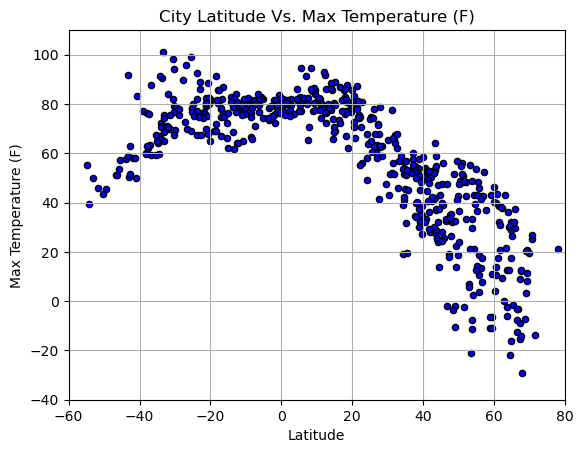

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.xlim(-60, 80)
plt.ylim(-40, 110)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

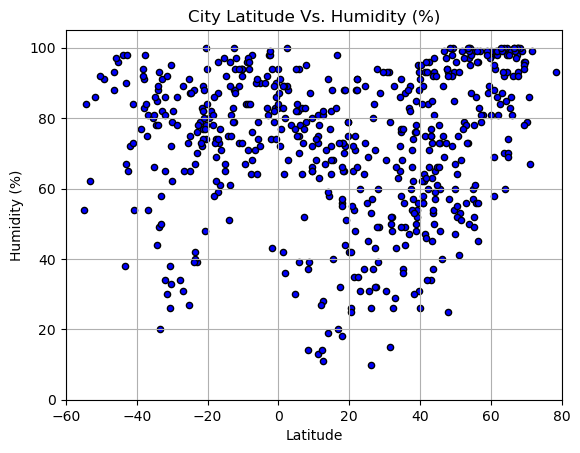

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-60, 80)
plt.ylim(0, 105)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

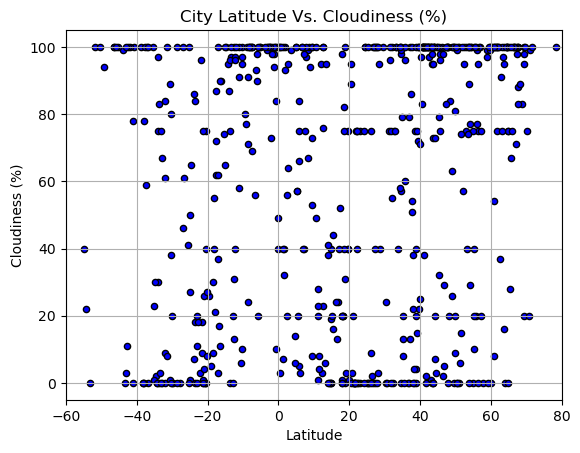

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness Numberical", marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-60, 80)
plt.ylim(-5, 105)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

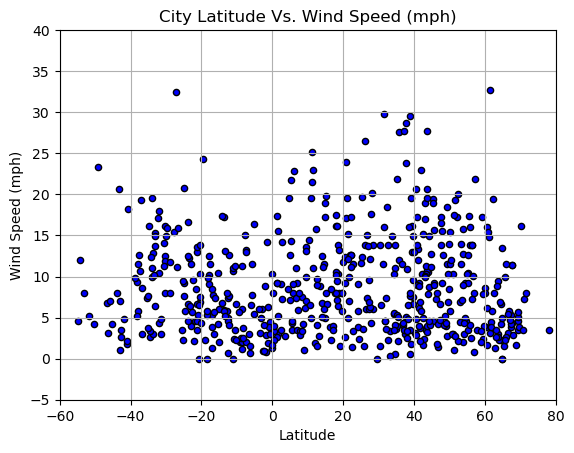

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", marker="o", color="blue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-60, 80)
plt.ylim(-5, 40)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_info, y_info):
    # Extract x and y from the DataFrame
    x = df[x_info]
    y = df[y_info]

    # Linear Regression Formula
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Create scatter plot
    plt.scatter(x, y,)

    # Plot the regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, label=f"(R^2 = {r_value **2:.2f})", color='red')

    # Format the regression equation (rounded to 2 decimal places) (chat GPT)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    #equation location
    ann_x = x.min() + 0.10 * (x.max() - x.min())
    ann_y = y.min() + 0.15 * (y.max() - y.min())

    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (ann_x, ann_y), fontsize=12, color="red")

    # Label axes and add a title
    plt.xlabel(x_info)
    plt.ylabel(y_info)
    plt.title(f"{x_info} Vs. {y_info} Linear Regression")

    
    plt.grid(True)

    # Show plot
    plt.show()

    # Print the correlation coefficient as an annotation (chat gpt suggestion)
    correlation_coefficient = stats.pearsonr(x, y)[0]
    print(f"Correlation coefficient: {correlation_coefficient:.2f}")
    print(f"The r^2-value is: {r_value ** 2:.2f}")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Cloudiness Numberical,Wind Speed,Country,Date
City_ID,,,,,,,,,,
3,faya-largeau,17.9257,19.1043,75.85,18,overcast clouds,98,17.52,TD,2025-03-06 15:14:36
4,klyuchi,52.2667,79.1667,33.44,79,overcast clouds,95,20.09,RU,2025-03-06 15:14:37
5,longyearbyen,78.2186,15.6401,21.04,93,light snow,100,3.44,SJ,2025-03-06 15:14:38
6,la passe,45.5549,-0.8967,56.10,73,overcast clouds,98,15.68,FR,2025-03-06 15:14:39
7,iqaluit,63.7506,-68.5145,-2.31,70,few clouds,16,3.00,CA,2025-03-06 15:14:40


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Cloudiness Numberical,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,emerald,-23.5333,148.1667,74.98,42,broken clouds,84,12.24,AU,2025-03-06 15:14:32
1,papatowai,-46.5619,169.4708,51.19,88,overcast clouds,100,6.76,NZ,2025-03-06 15:14:34
2,puerto natales,-51.7236,-72.4875,46.04,86,light rain,100,5.14,CL,2025-03-06 15:14:35
8,west island,-12.1568,96.8225,80.58,94,light rain,40,12.66,CC,2025-03-06 15:10:54
9,edinburgh of the seven seas,-37.0676,-12.3116,63.36,75,overcast clouds,100,19.30,SH,2025-03-06 15:14:44


###  Temperature vs. Latitude Linear Regression Plot

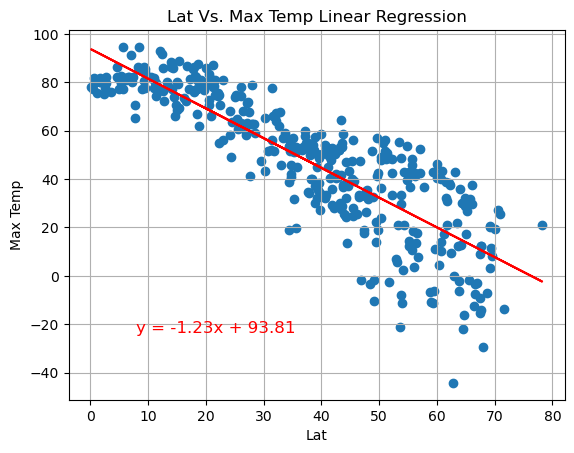

Correlation coefficient: -0.86
The r^2-value is: 0.74


In [15]:
# Linear regression on Northern Hemisphere (googled for formating)

plot_linear_regression(northern_hemi_df, "Lat", "Max Temp")


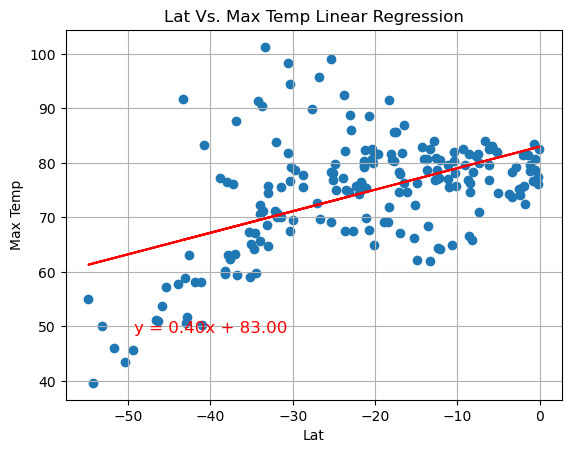

Correlation coefficient: 0.50
The r^2-value is: 0.25


In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Discussion about Lattitude and Max Temp
#  Correlations
A Strong negative correlation coefficient can be observed in the northern hemisphere (-.86)and a modereate positive correlation can be seen in the southern hemisphere.(.50)  

This means that an increase in latitude will likely decrease the maximum temperature.
This also means that a decrease in lattitude will increase the maximum temperature.
(moving from the center)


### Humidity vs. Latitude Linear Regression Plot

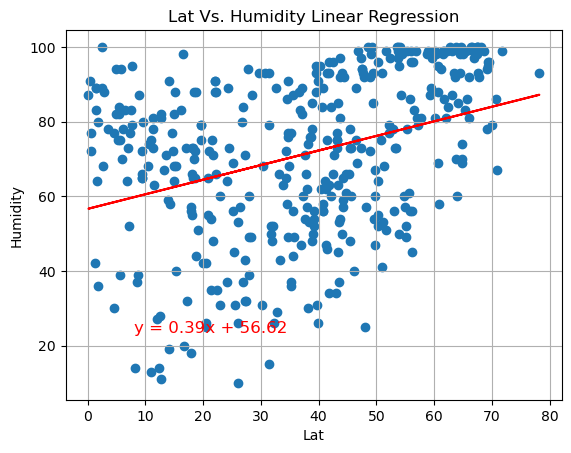

Correlation coefficient: 0.35
The r^2-value is: 0.12


In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity")

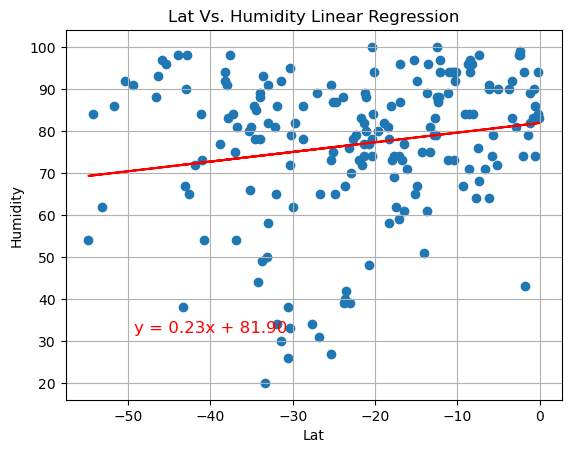

Correlation coefficient: 0.18
The r^2-value is: 0.03


In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Discussion about Lattitude and Humidity
#  Correlations
A weak positive correlation coefficient can be observed in the northern hemisphere (.35))and a very weak positive correlation can be seen in the southern hemisphere.(.18)  

This doesnt not show a relation of latitude to humidity by itself.

### Cloudiness vs. Latitude Linear Regression Plot

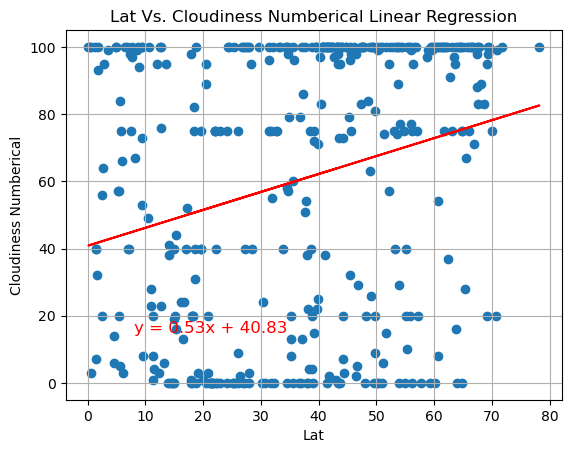

Correlation coefficient: 0.26
The r^2-value is: 0.07


In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness Numberical")

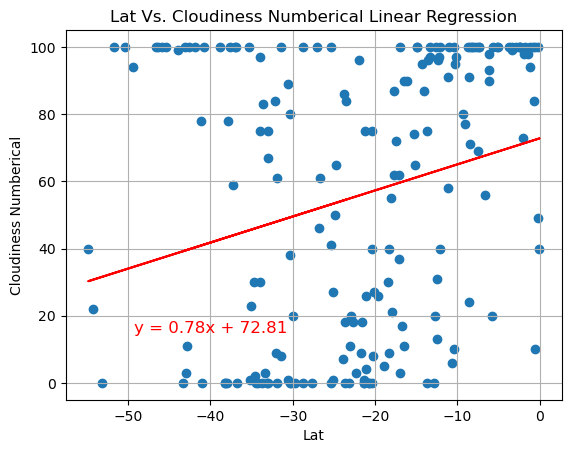

Correlation coefficient: 0.26
The r^2-value is: 0.07


In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness Numberical")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

A weak positive correlation coefficient can be observed in the northern hemisphere (.26)) a weak positive correlation can be seen in the southern hemisphere.(.26)  

This doesnt not show a relation of latitude to the number of clouds by itself.

### Wind Speed vs. Latitude Linear Regression Plot

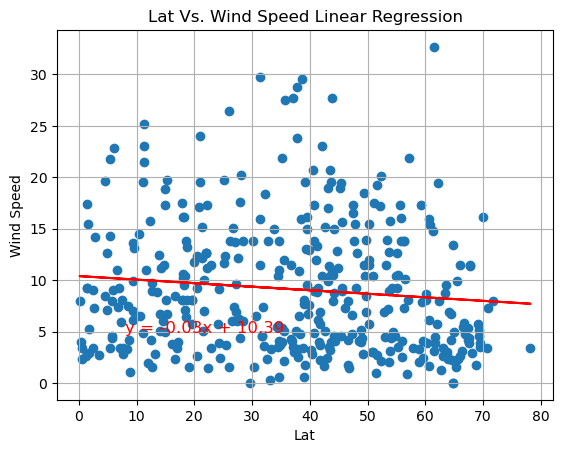

Correlation coefficient: -0.11
The r^2-value is: 0.01


In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed")



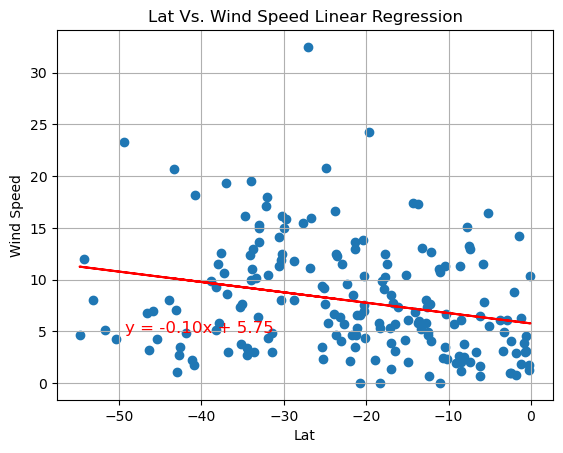

Correlation coefficient: -0.25
The r^2-value is: 0.06


In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

A very weak negative correlation coefficient can be observed in the northern hemisphere (-0.11))and a very weak negative correlation can be seen in the southern hemisphere.(-0.25)

This doesnt not show a relation of latitude to wind speed by itself.